In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
##Radam Forests

In [9]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9841777777777777


In [10]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.28, 0.72]])

In [11]:
# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


In [13]:
# Adaboost Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

c:\Users\praneetha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [15]:
# KNNClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


**No we will focus on selecting the best threshold for maximum accuracy**

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850333333333334


In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991873,0.559186,1.0
1,0.05,0.000008,0.463282,0.0
2,0.98,0.966763,0.538202,0.8
3,0.97,0.761896,0.509875,0.8
4,0.55,0.779209,0.490344,0.4
...,...,...,...,...
595,0.00,0.024263,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984400,0.532403,1.0
598,0.05,0.001157,0.441720,0.2


In [19]:
final_prediction

0      0.882765
1      0.128323
2      0.821241
3      0.760443
4      0.554888
         ...   
595    0.121346
596    0.115345
597    0.879201
598    0.173219
599    0.834858
Length: 600, dtype: float64

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.91072489, 0.90623186, 0.90577496, 0.81244051,
       0.80806746, 0.79974489, 0.79909566, 0.77320685, 0.77077862,
       0.76629272, 0.76536546, 0.739354  , 0.73883029, 0.70470292,
       0.70139901, 0.675055  , 0.66743002, 0.6099439 , 0.59641408,
       0.59383931, 0.59047279, 0.57983772, 0.57733761, 0.54586694,
       0.53903224, 0.52854506, 0.48866162, 0.45492251, 0.43540076,
       0.42699699, 0.39657193, 0.3963691 , 0.36501725, 0.35585998,
       0.24899346, 0.24127731, 0.20645902, 0.20601676, 0.12283629,
       0.12283511, 0.10548455])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.435401,0.960000
28,0.454923,0.960000
30,0.426997,0.958333
27,0.488662,0.958333
26,0.528545,0.958333


In [22]:

accuracy_ls

,thresholds,accuracy
29,0.435401,0.960000
28,0.454923,0.960000
30,0.426997,0.958333
27,0.488662,0.958333
26,0.528545,0.958333
25,0.539032,0.956667
24,0.545867,0.956667
31,0.396572,0.950000
32,0.396369,0.948333
23,0.577338,0.948333


In [23]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

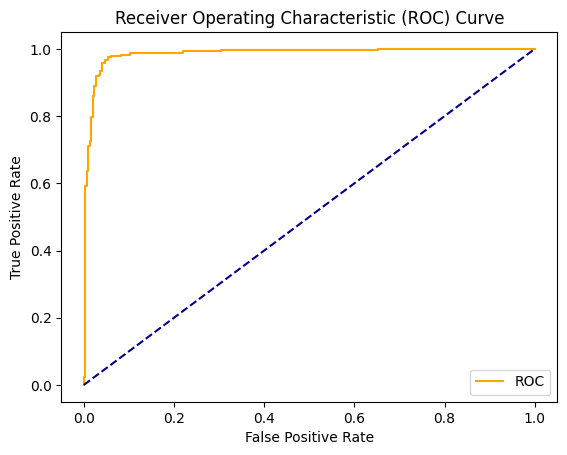

In [24]:
plot_roc_curve(fpr,tpr)